# Resoure Preparation

### Setup Library

In [ ]:
!pip -q install tensorflow_text
!pip -q install pythainlp 
!pip -q install python-crfsuite

     |████████████████████████████████| 4.6 MB 3.8 MB/s 
     |████████████████████████████████| 511.7 MB 5.8 kB/s 
     |████████████████████████████████| 5.8 MB 27.9 MB/s 
     |████████████████████████████████| 438 kB 52.4 MB/s 
     |████████████████████████████████| 1.6 MB 42.2 MB/s 
     |████████████████████████████████| 11.5 MB 3.3 MB/s 
     |████████████████████████████████| 965 kB 4.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
import re

import gdown

### Download Dataset

In [ ]:
driveURL = "https://drive.google.com/file/d/1SxotuRhV8QE_sPWCVJS0m4csgL4xTgj5/view?usp=sharing"
downloadURL = 'https://drive.google.com/uc?export=download&id='+driveURL.split('/')[-2]
gdown.download(downloadURL)

Downloading...
From: https://drive.google.com/uc?export=download&id=1SxotuRhV8QE_sPWCVJS0m4csgL4xTgj5
To: /content/TNC_DataSet_2500.zip
100%|██████████| 11.6M/11.6M [00:00<00:00, 61.7MB/s]


'TNC_DataSet_2500.zip'

In [ ]:
driveURL = "https://drive.google.com/file/d/1SSGqkBELTKHAy4M0yVXRBcFuCNOC-DTa/view?usp=sharing"
downloadURL = 'https://drive.google.com/uc?export=download&id='+driveURL.split('/')[-2]
gdown.download(downloadURL)

Downloading...
From: https://drive.google.com/uc?export=download&id=1SSGqkBELTKHAy4M0yVXRBcFuCNOC-DTa
To: /content/TNC_TestSet_5000.csv
100%|██████████| 27.3M/27.3M [00:00<00:00, 226MB/s]


'TNC_TestSet_5000.csv'

In [ ]:
!unzip TNC_DataSet_2500.zip

Archive:  TNC_DataSet_2500.zip
  inflating: dataset_info.txt        
  inflating: TNC_TestSet_2500.csv    
  inflating: TNC_TrainSet_2500.csv   
  inflating: TNC_ValidationSet_2500.csv  


# Data Preprocessing

In [ ]:
train_df = pd.read_csv("TNC_TrainSet_2500.csv")
valid_df = pd.read_csv("TNC_ValidationSet_2500.csv")

test_df = pd.read_csv("TNC_TestSet_5000.csv")

In [ ]:
len(test_df)

5400

In [ ]:
all_df = pd.concat([train_df,valid_df,test_df]).reset_index(drop=True)

In [ ]:
def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def replace_rep(text):
    def _replace_rep(m):
        c,cc = m.groups()
        return f'{c}xxrep'
    re_rep = re.compile(r'(\S)(\1{2,})')
    return re_rep.sub(_replace_rep, text)

def process_text(text):
    #pre rules
    res = text.lower().strip() 
    res = replace_url(res)
    res = replace_rep(res) 
    
    #tokenize
    res = [word for word in word_tokenize(res) if word and not re.search(pattern=r"\s+", string=word)]
    return res
    
DOMAIN_DICT = {
      0 : 'Imaginative',
      1 : 'Natural & Pure Science',
      2 : 'Applied Science',
      3 : 'Social Science ',
      4 : 'History',
      5 : 'Commerce & Finance',
      6 : 'Arts',
      7 : 'Belief & Thought'
  }

In [ ]:
#Data Preprocessing
train_df['Processed'] = train_df.Texts.map(lambda x: '|'.join(process_text(x)))
valid_df['Processed'] = valid_df.Texts.map(lambda x: '|'.join(process_text(x)))
test_df['Processed'] = test_df.Texts.map(lambda x: '|'.join(process_text(x)))

#Shuffle Row
train_df = train_df.sample(frac=1,random_state=69).reset_index(drop=True)
valid_df = valid_df.sample(frac=1,random_state=69).reset_index(drop=True)
test_df = test_df.sample(frac=1,random_state=69).reset_index(drop=True)

# Train a Bag of Words

### Set up Traning Variable 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(tokenizer=process_text, ngram_range=(1,2), min_df=30, max_df=0.8, sublinear_tf=True)
tfidf_fit = tfidf.fit(all_df['Texts'])
text_train = tfidf_fit.transform(train_df['Texts'])
text_valid = tfidf_fit.transform(valid_df['Texts'])
text_test = tfidf_fit.transform(test_df['Texts'])
text_train.shape, text_valid.shape

y_train = train_df['Category']
y_valid = valid_df['Category']
y_test = test_df['Category']


text_train.shape, text_valid.shape, text_test.shape

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


((12600, 40681), (2696, 40681), (5400, 40681))

In [ ]:
X_train = text_train.toarray()
X_valid = text_valid.toarray()
X_test = text_test.toarray()
X_train.shape, X_valid.shape, X_test.shape

((12600, 40681), (2696, 40681), (5400, 40681))

### Fit data to model 

In [ ]:
model = LogisticRegression(C=2., penalty='l2', solver='liblinear', dual=False, multi_class='ovr')
model.fit(X_train,y_train)
model.score(X_valid,y_valid)

0.8501483679525222

In [ ]:
model.score(X_test,y_test)

0.6453703703703704

# Model Evaluation

### Evaluate on validation set 

In [ ]:
from sklearn.metrics import classification_report
y_val_pred = model.predict(X_valid)
y_val_true = np.array(y_valid)
print(classification_report(y_valid, y_val_pred))

                        precision    recall  f1-score   support

       Applied Science       0.89      0.92      0.90       337
                  Arts       0.78      0.70      0.74       337
      Belief & Thought       0.92      0.85      0.88       337
    Commerce & Finance       0.97      0.97      0.97       337
               History       0.94      1.00      0.97       337
           Imaginative       0.77      1.00      0.87       337
Natural & Pure Science       0.75      0.58      0.65       337
       Social Science        0.77      0.78      0.78       337

              accuracy                           0.85      2696
             macro avg       0.85      0.85      0.85      2696
          weighted avg       0.85      0.85      0.85      2696



In [ ]:
sorted_y_class = ['Applied Science',
                  'Arts',
                  'Belief & Thought',
                  'Commerce & Finance',
                  'History',
                  'Imaginative',
                  'Natural & Pure Science',
                  'Social Science', ]

In [ ]:
#confusion matrix
import numpy
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

cm = confusion_matrix(y_val_true, y_val_pred)
cm

array([[310,   0,   0,   0,   0,   0,   4,  23],
       [  0, 236,   9,   0,   2,  23,  49,  18],
       [  0,   4, 287,   0,   0,  37,   7,   2],
       [  1,   0,   0, 326,   0,   0,   0,  10],
       [  0,   0,   0,   1, 336,   0,   0,   0],
       [  0,   0,   0,   0,   0, 337,   0,   0],
       [ 38,  44,  12,   1,   0,  22, 196,  24],
       [  0,  19,   4,   9,  18,  16,   7, 264]])

<Figure size 100000x300000 with 0 Axes>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


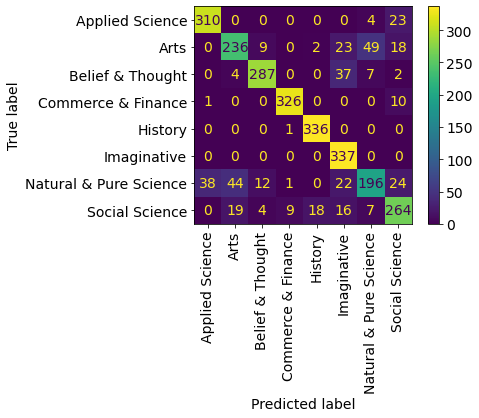

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sorted_y_class)

font = {'family' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

figure(figsize=(100, 300), dpi=1000)
disp.plot()
plt.xticks(rotation='vertical')
plt.show()

### Evaluate on test set 

In [ ]:
y_test_pred = model.predict(X_test)
y_test_true = np.array(y_test)
print(classification_report(y_test, y_test_pred))

                        precision    recall  f1-score   support

       Applied Science       0.78      0.47      0.59       675
                  Arts       0.54      0.55      0.54       675
      Belief & Thought       0.88      0.83      0.86       675
    Commerce & Finance       0.76      0.93      0.83       675
               History       0.73      0.19      0.30       675
           Imaginative       0.66      0.97      0.78       675
Natural & Pure Science       0.52      0.48      0.50       675
       Social Science        0.49      0.75      0.59       675

              accuracy                           0.65      5400
             macro avg       0.67      0.65      0.62      5400
          weighted avg       0.67      0.65      0.62      5400



In [ ]:
#confusion matrix
new_cm = confusion_matrix(y_test_true, y_test_pred)
new_cm

array([[318,   5,   0,  75,   4,   2, 223,  48],
       [  8, 369,  35,   4,   3, 110,  17, 129],
       [  0,   9, 562,   0,   0,  53,  51,   0],
       [  3,   0,   1, 627,   8,   0,   1,  35],
       [  0, 121,  12, 100, 125,  19,   0, 298],
       [  0,  13,   3,   0,   0, 653,   3,   3],
       [ 63, 121,  14,   1,   1, 126, 324,  25],
       [ 16,  49,  12,  20,  30,  32,   9, 507]])

<Figure size 100000x300000 with 0 Axes>

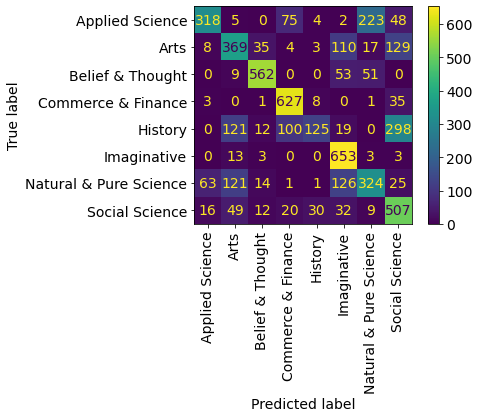

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=new_cm,
                              display_labels=sorted_y_class)

font = {'family' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

figure(figsize=(100, 300), dpi=1000)
disp.plot()
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

                        precision    recall  f1-score   support

       Applied Science       0.78      0.47      0.59       675
                  Arts       0.54      0.55      0.54       675
      Belief & Thought       0.88      0.83      0.86       675
    Commerce & Finance       0.76      0.93      0.83       675
               History       0.73      0.19      0.30       675
           Imaginative       0.66      0.97      0.78       675
Natural & Pure Science       0.52      0.48      0.50       675
       Social Science        0.49      0.75      0.59       675

              accuracy                           0.65      5400
             macro avg       0.67      0.65      0.62      5400
          weighted avg       0.67      0.65      0.62      5400



# Model testing

In [ ]:
sample = [
          'ไอโซโทปที่พบมากที่สุดของไฮโดรเจน คือ โปรเทียม (ชื่อพบใช้น้อย สัญลักษณ์ 1H) ซึ่งมีโปรตอนหนึ่งตัวแต่ไม่มีนิวตรอน ในสารประกอบไอออนิก โปรเทียมสามารถรับประจุลบ (แอนไอออนซึ่งมีชื่อว่า ไฮไดรด์ และเขียนสัญลักษณ์ได้เป็น H-)',
          'ปอบ เป็นผีจำพวกหนึ่ง ที่อยู่ในความเชื่อพื้นบ้านของไทย โดยเฉพาะในภาคอีสาน โดยเชื่อกันว่าเป็นผีที่กินของดิบ ๆ สด ๆ กินเท่าไหร่ก็ไม่อิ่ม',
          'แสดงความยินดีกับนายชัชชาติ สิทธิพันธุ์ ที่ได้รับความไว้วางใจจากพี่น้องชาวกรุงเทพมหานคร เลือกเป็นผู้ว่าราชการกรุงเทพมหานคร'
          ]

sample_feature = tfidf_fit.transform(sample)
model.predict(sample_feature)

array(['Applied Science', 'Belief & Thought', 'Commerce & Finance'],
      dtype=object)

In [ ]:
sample = [
          'ต้นโกงกาง เป็นต้นไม้ที่เติมโตในบริเวณป่าชายเลนที่ใกล้กับทะเล เป็นต้นที่ช่วยให้ระบบนิเวศป่าโกงกางมีความอุดมสมบูรณ์อย่างมาก และพบเจอหลายสายพันธุ์',
          'ม้านิลมังกร หรือ ม้ามังกร สัตว์ประหลาดในวรรณคดีไทยเรื่องพระอภัยมณี ตามจินตนาการของสุนทรภู่ เป็นพาหนะของสุดสาคร',
          'สกุลเงินดิจิทัล หรือ คริปโตเคอร์เรนซี คือ สินทรัพย์ดิจิทัล ประเภทหนึ่งที่มีการรักษาความปลอดภัยด้วยการเข้ารหัส ถูกออกแบบมาเพื่อใช้เป็นสื่อกลางในการแลกเปลี่ยนเช่นเดียวกับสกุลเงินทั่วไป เพียงแต่ไม่สามารถจับต้องได้'
          ]

sample_feature = tfidf_fit.transform(sample)
model.predict(sample_feature)

array(['Natural & Pure Science', 'Arts', 'Commerce & Finance'],
      dtype=object)